In [ ]:
print("Allah")

In [75]:
import pandas as pd
import numpy as np
dfle = pd.read_csv("homeprice.csv")
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [ ]:
# le

In [ ]:
# dfle.town = le.fit_transform(dfle.town)

In [ ]:
# dfle


In [76]:
dfle.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [77]:
dfle.town.value_counts()

monroe township    5
west windsor       4
robinsville        4
Name: town, dtype: int64

In [78]:
# now Columns Splitting  into X and y
X = dfle[['town','area']].values
X
# y = dfle.price.values
# y

array([['monroe township', 2600],
       ['monroe township', 3000],
       ['monroe township', 3200],
       ['monroe township', 3600],
       ['monroe township', 4000],
       ['west windsor', 2600],
       ['west windsor', 2800],
       ['west windsor', 3300],
       ['west windsor', 3600],
       ['robinsville', 2600],
       ['robinsville', 2900],
       ['robinsville', 3100],
       ['robinsville', 3600]], dtype=object)

In [79]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [ ]:
y.ndim

In [ ]:
X.ndim

In [80]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer # Here is the one

le = LabelEncoder()

In [81]:
# dfle.town = labelencoder_X_1.fit_transform(dfle.town)
dfle.town = le.fit_transform(dfle.town)

In [82]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [83]:
ct = ColumnTransformer([("town", OneHotEncoder(), [0])], remainder = 'passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('town', OneHotEncoder(), [0])])

In [84]:
X = ct.fit_transform(X)

In [85]:
X

array([[1.0, 0.0, 0.0, 2600],
       [1.0, 0.0, 0.0, 3000],
       [1.0, 0.0, 0.0, 3200],
       [1.0, 0.0, 0.0, 3600],
       [1.0, 0.0, 0.0, 4000],
       [0.0, 0.0, 1.0, 2600],
       [0.0, 0.0, 1.0, 2800],
       [0.0, 0.0, 1.0, 3300],
       [0.0, 0.0, 1.0, 3600],
       [0.0, 1.0, 0.0, 2600],
       [0.0, 1.0, 0.0, 2900],
       [0.0, 1.0, 0.0, 3100],
       [0.0, 1.0, 0.0, 3600]], dtype=object)

In [ ]:
X.shape

In [ ]:
X = X[:,1:]

In [ ]:
X

In [ ]:
# X = X[:,1:]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
model.predict([[0,1,3400]])

In [ ]:
model.predict([[1,0,2800]])

# Car Exercise

# Car Exercise   one Hot Encoder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d_f = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv")

In [3]:
d_f.to_csv("carprices.csv",index = False)

In [4]:
d_f

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [5]:
# column name change car Model to  Car_Model

d_f.rename(columns={'Car Model':"Car_Model"},inplace =True)
d_f.rename(columns={'Sell Price($)':'Sell_Price_USD'},inplace =True)
d_f.rename(columns={'Age(yrs)':'Age_in_year'},inplace =True)

In [6]:
# Car model colum is in text format or called categorical data
# first we check columns names
d_f.columns

Index(['Car_Model', 'Mileage', 'Sell_Price_USD', 'Age_in_year'], dtype='object')

In [7]:
# dfle.town.value_counts()
d_f.Car_Model.value_counts()

BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: Car_Model, dtype: int64

In [8]:
d_f.Car_Model.unique()

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

In [9]:
d_f.shape

(13, 4)

In [10]:
d_f

,Car_Model,Mileage,Sell_Price_USD,Age_in_year
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [11]:
# data Splitting
X = d_f[['Mileage','Age_in_year']]
X

,Mileage,Age_in_year
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [12]:
y = d_f['Sell_Price_USD']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price_USD, dtype: int64

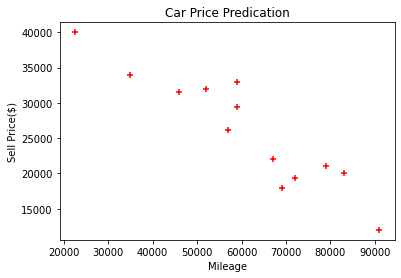

In [13]:
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.title("Car Price Predication")
plt.scatter(d_f.Mileage,d_f.Sell_Price_USD,color = 'red',marker = '+')

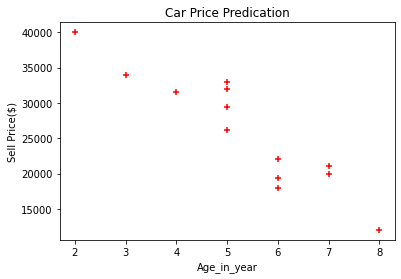

In [14]:
plt.xlabel("Age_in_year")
plt.ylabel("Sell Price($)")
plt.title("Car Price Predication")
plt.scatter(d_f.Age_in_year,d_f.Sell_Price_USD,color = 'red',marker = '+')

In [15]:
d_f

,Car_Model,Mileage,Sell_Price_USD,Age_in_year
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [16]:
# Car_Model convert into dummies 
dummies = pd.get_dummies(d_f.Car_Model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [17]:
# concatenate dummies with orignal data frame d_f
d_f = pd.concat([d_f,dummies],axis ='columns')
d_f

,Car_Model,Mileage,Sell_Price_USD,Age_in_year,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [21]:
# Car model colum must be drop 
d_f.drop(columns='Car_Model',inplace =True)

In [22]:
d_f

,Mileage,Sell_Price_USD,Age_in_year,Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [24]:
# data splitting 
X = d_f[['Mileage','Age_in_year','Audi A5','BMW X5','Mercedez Benz C class']]
X

,Mileage,Age_in_year,Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [26]:
y = d_f['Sell_Price_USD']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price_USD, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(X,y)

LinearRegression()

In [31]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03,  6.10375284e+02, -3.67429130e+03,
        3.06391602e+03])

In [32]:
model.intercept_

55912.70994756205

In [34]:
model.score(X,y)

0.9417050937281083

In [35]:
# get price of 	BMW X5 , millage 69000,age 6,
model.predict([[69000,6,0,1,0]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18705.2723644])

In [36]:
# Audi car millage 91000,age =8
model.predict([[91000,8,1,0,0]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12182.34562104])

In [37]:
# car Millage 59000,age = 5,,Mercedez Benz C class
model.predict([[59000,5,0,0,1]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30477.15426156])

# CarPrice Example with Sklearn Lib

# use One Hot Encoding

In [43]:
dfohe = pd.read_csv("carprices.csv")
dfohe

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [49]:
# column name change car Model to  Car_Model

dfohe.rename(columns={'Car Model':"Car_Model"},inplace =True)
dfohe.rename(columns={'Sell Price($)':'Sell_Price_USD'},inplace =True)
dfohe.rename(columns={'Age(yrs)':'Age_in_year'},inplace =True)

In [53]:
dfohe

,Car_Model,Mileage,Sell_Price_USD,Age_in_year
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Step 1 Label Encoding of column of Car_Model

In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
le

LabelEncoder()

In [62]:
# from sklearn.compose import ColumnTransformer

# Step 2 label Encodel Fit and transform the column,you want to categoriezes

In [ ]:
# Car_Model column is categorized into 0,1,2 ....
dfohe.Car_Model = le.fit_transform(dfohe.Car_Model)
dfohe

,Car_Model,Mileage,Sell_Price_USD,Age_in_year
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [72]:

# now Columns Splitting  into X and y
X = dfohe[['Car_Model','Mileage','Age_in_year']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [69]:
y = dfohe.Sell_Price_USD.values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [95]:
from sklearn.compose import ColumnTransformer

In [86]:
ct = ColumnTransformer([("Car_Model", OneHotEncoder(), [0])], remainder = 'passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Car_Model', OneHotEncoder(), [0])])

In [88]:
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 1.0, 0.0, 0.0, 2600],
       [1.0, 0.0, 1.0, 0.0, 0.0, 3000],
       [1.0, 0.0, 1.0, 0.0, 0.0, 3200],
       [1.0, 0.0, 1.0, 0.0, 0.0, 3600],
       [1.0, 0.0, 1.0, 0.0, 0.0, 4000],
       [0.0, 1.0, 0.0, 0.0, 1.0, 2600],
       [0.0, 1.0, 0.0, 0.0, 1.0, 2800],
       [0.0, 1.0, 0.0, 0.0, 1.0, 3300],
       [0.0, 1.0, 0.0, 0.0, 1.0, 3600],
       [0.0, 1.0, 0.0, 1.0, 0.0, 2600],
       [0.0, 1.0, 0.0, 1.0, 0.0, 2900],
       [0.0, 1.0, 0.0, 1.0, 0.0, 3100],
       [0.0, 1.0, 0.0, 1.0, 0.0, 3600]], dtype=object)

In [92]:
X = X[:,1:]
X

array([[1.0, 0.0, 0.0, 2600],
       [1.0, 0.0, 0.0, 3000],
       [1.0, 0.0, 0.0, 3200],
       [1.0, 0.0, 0.0, 3600],
       [1.0, 0.0, 0.0, 4000],
       [0.0, 0.0, 1.0, 2600],
       [0.0, 0.0, 1.0, 2800],
       [0.0, 0.0, 1.0, 3300],
       [0.0, 0.0, 1.0, 3600],
       [0.0, 1.0, 0.0, 2600],
       [0.0, 1.0, 0.0, 2900],
       [0.0, 1.0, 0.0, 3100],
       [0.0, 1.0, 0.0, 3600]], dtype=object)

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [91]:
model.score(X,y)

0.9573929037221873

In [97]:
model.predict([[1,0,0,2600,6]])

array([35944751.70930938])